# ✅金利オプションについて知る必要がある!(20250203)

# 金利モデル

金利モデルを使用して金利変動をモデリングし、それに基づいてオプション価格を評価する方法は、金融工学やデリバティブ評価で非常に重要です。Cox-Ingersoll-Ross (CIR)モデルやVasicekモデルは、金利の動きを捉えるためによく使われます。これらのモデルを使ってオプション価格を評価するプロセスを簡単に説明します。

# Cox-Ingersoll-Ross (CIR) モデル

CIRモデルは、短期金利が確率的に変動する過程をモデル化します。このモデルは以下のSDE（確率微分方程式）に基づいています：

$
dr_t = κ(θ - r_t) dt + σ √r_t dW_t
$

- rt: 金利（短期金利）
- 𝜅: 金利の平均回帰速度
- θ: 平均金利レベル（ロングタームレベル）
- σ: 金利のボラティリティ
- 𝑑𝑊𝑡: 標準ブラウン運動（確率過程）

このモデルは、**金利がゼロにはならない**ことが特徴です。

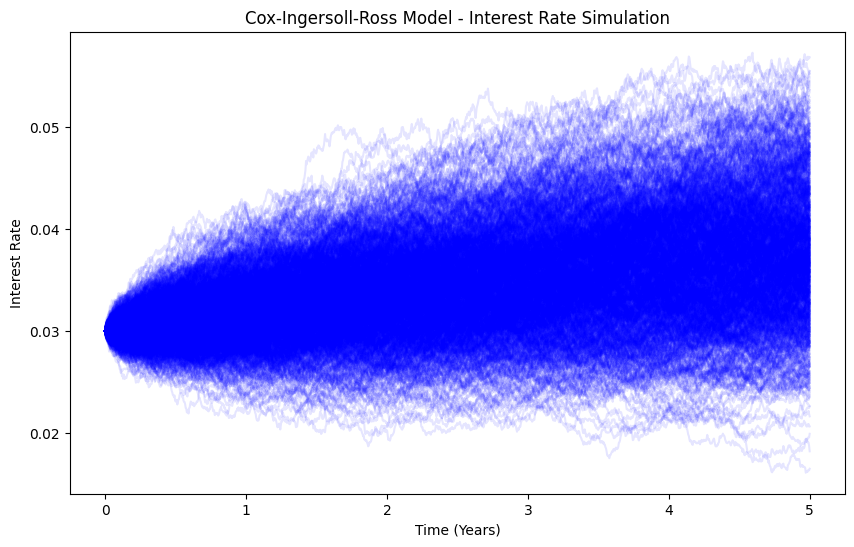

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# CIRモデルのパラメータ
kappa = 0.1  # 平均回帰速度
theta = 0.05  # 平均金利レベル
sigma = 0.02  # ボラティリティ
r0 = 0.03  # 初期金利
T = 5  # シミュレーション期間（年）
dt = 1/252  # 1日単位での刻み
N = int(T / dt)  # ステップ数
M = 1000  # シミュレーション回数

# シミュレーションを実行
np.random.seed(42)
r = np.zeros((M, N))
r[:, 0] = r0

for i in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt), M)  # ブラウン運動
    r[:, i] = r[:, i-1] + kappa * (theta - r[:, i-1]) * dt + sigma * np.sqrt(r[:, i-1]) * dW

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N), r.T, alpha=0.1, color='blue')
plt.title("Cox-Ingersoll-Ross Model - Interest Rate Simulation")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.show()


# Vasicek モデル
Vasicekモデルも金利をモデリングするための確率微分方程式で、次のように表されます：

$
dr_t = κ(θ - r_t) dt + σ dW_t
$

- rt: 金利
- κ: 平均回帰速度
- θ: 平均金利レベル
- σ: 金利のボラティリティ
- 𝑑𝑊𝑡: 標準ブラウン運動

CIRモデルと異なり、Vasicekモデルでは**金利がゼロになる可能性があります**。

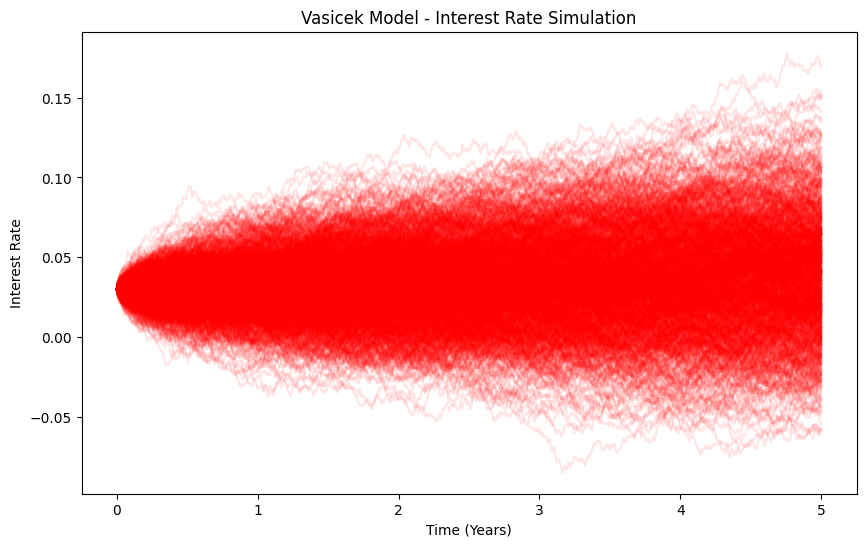

In [ ]:
# Vasicekモデルのパラメータ
kappa_v = 0.1  # 平均回帰速度
theta_v = 0.05  # 平均金利レベル
sigma_v = 0.02  # ボラティリティ
r0_v = 0.03  # 初期金利

# シミュレーションを実行
r_v = np.zeros((M, N))
r_v[:, 0] = r0_v

for i in range(1, N):
    dW_v = np.random.normal(0, np.sqrt(dt), M)  # ブラウン運動
    r_v[:, i] = r_v[:, i-1] + kappa_v * (theta_v - r_v[:, i-1]) * dt + sigma_v * dW_v

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, N), r_v.T, alpha=0.1, color='red')
plt.title("Vasicek Model - Interest Rate Simulation")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.show()


1. 金利モデルのシミュレーション

Cox-Ingersoll-Ross (CIR) モデルやVasicek モデルは、短期金利や金利の動きを確率的にモデル化するために使用されます。これらのモデルは、金融市場での金利変動を理解するために非常に有用であり、特に金利に依存したデリバティブ（オプションやスワップなど）の価格設定に不可欠です。

# 意義:

- CIRモデル: このモデルは金利がゼロ以下になるのを防ぐ特性を持っており、現実の金融市場で観察される金利変動に近い動きを反映できます。そのため、金利が非常に低いまたは高い状況でも有用です。
- Vasicekモデル: こちらは金利がゼロになることを許容するため、より柔軟に適用可能です。特に金利が低くなる環境において有効なモデルです。
金利シミュレーションを行うことで、将来の金利動向を予測し、金利に依存する金融商品の価格をより現実的に評価することが可能になります。

# 金利オプション価格の評価

金利をモデリングするためにCox-Ingersoll-RossやVasicekモデルを使用し、金利オプション（例えば、金利スワップションやCap/Floor）の価格を評価する際には、モンテカルロシミュレーションやフィンバーグの有限差分法（Finite Difference Methods）などを使うことが一般的です。

例: 金利スワップションの場合

金利スワップションは、金利スワップの契約のオプション版で、契約締結前に金利スワップを結ぶかどうかを決定するものです。これを評価するために、Cox-Ingersoll-RossモデルやVasicekモデルを使って、契約時に想定される金利の未来の変動をシミュレートします。

モンテカルロシミュレーションの流れ：
1. シミュレーションの準備:

- 初期金利r0 を設定。
- CIRまたはVasicekモデルのパラメータ（κ,θ,σ）を設定。

2. 金利パスの生成:

- シミュレーション回数に基づき、金利パスをモンテカルロ法で生成。

3. オプションのキャッシュフロー計算:

- それぞれの金利パスに基づき、オプションのキャッシュフローを計算。

4. 期待値の計算:

- 各キャッシュフローを割引き、オプションの現在価値を求める。

5. 価格算出:

- シミュレーション結果を基に金利オプションの価格を算出。

### アプローチの選択

- モンテカルロシミュレーション: 複雑なデリバティブ商品の価格評価に使用され、非常に柔軟です。
- 有限差分法（Finite Difference Methods）: 価格評価において高速ですが、一定の条件下でのみ適用可能です。


In [ ]:
# スワップション評価のためのパラメータ
notional = 1000000  # 名目金額
strike_rate = 0.04  # ストライク金利
payment_frequency = 2  # 支払頻度（年）
discount_factor = np.exp(-0.05 * T)  # 割引因子（5%の金利を仮定）

# モンテカルロシミュレーションによるスワップション価格
option_prices = np.zeros(M)
for i in range(M):
    # 各パスに対する金利スワップのキャッシュフロー計算
    final_rate = r[i, -1]  # 最終金利
    if final_rate > strike_rate:
        # スワップションが行使される場合のキャッシュフロー
        option_prices[i] = notional * (final_rate - strike_rate) * payment_frequency

# オプション価格の期待値
option_price = np.mean(option_prices) * discount_factor
print(f"Interest Rate Swaption Price: {option_price:.2f}")


Interest Rate Swaption Price: 2555.25
